# 📊 Data visualization

In this module we want to inspect the dataset to check whether there is any class imbalance, if the data needs any additional cleanup work, and to have a basic idea of its structure and data types. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.load_data import load_dataset_as_dataframe
from utils.data_cleaner import data_cleaner

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 1. Load the Data
df1, df2, df3 = load_dataset_as_dataframe()

# 2. Clean and Merge the Data
dataframes_list = [df1, df2, df3]
source_names_list = ['1429_1', 'Datafiniti_Products', 'Datafinit_Products_May19']

# Clean the data and remove the duplicates
final_df = data_cleaner(dataframes_list, source_names_list)


Processing DataFrame from '1429_1'...
Finished processing '1429_1'. Found 34660 rows.
Processing DataFrame from 'Datafiniti_Products'...
Finished processing 'Datafiniti_Products'. Found 5000 rows.
Processing DataFrame from 'Datafinit_Products_May19'...
Finished processing 'Datafinit_Products_May19'. Found 28332 rows.

Merging all datasets...
Total rows after merge: 67992
Dropped 2153 duplicate reviews.
Dropped 6810 rows due to missing (MUST HAVE) data.
Final merged dataset has 59029 rows.


Dataset shape: (59029, 12)

<class 'pandas.core.frame.DataFrame'>
Index: 59029 entries, 0 to 67991
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          59029 non-null  object 
 1   categories            59029 non-null  object 
 2   review_rating         59029 non-null  float64
 3   review_text           59029 non-null  object 
 4   review_title          59029 non-null  object 
 5   image_urls            31166 non-null  object 
 6   review_date           59011 non-null  object 
 7   review_recommend      47124 non-null  object 
 8   review_helpful_count  47186 non-null  float64
 9   source_urls           31166 non-null  object 
 10  review_username       59019 non-null  object 
 11  data_source           59029 non-null  object 
dtypes: float64(2), object(10)
memory usage: 5.9+ MB

                                        product_name  \
0  All-New Fire HD 8 Tablet, 8 HD Display, W

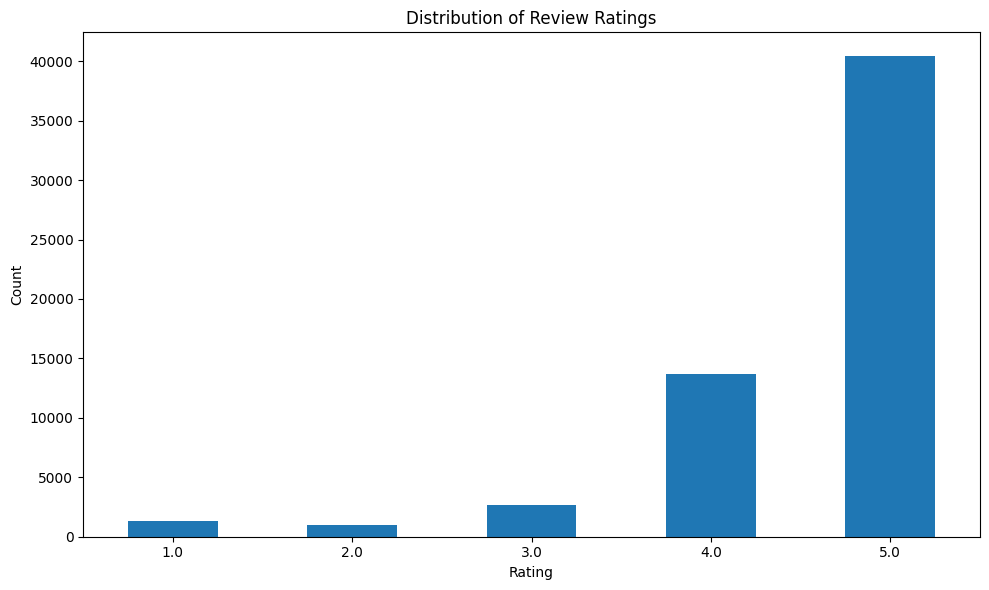


Review text length statistics:
count    59029.000000
mean       149.919870
std        195.107295
min          1.000000
25%         64.000000
50%         99.000000
75%        175.000000
max      10670.000000
Name: review_text_length, dtype: float64

Average text length by rating:
review_rating
1.0    219.905120
2.0    221.820926
3.0    182.868771
4.0    166.943160
5.0    137.948451
Name: review_text_length, dtype: float64


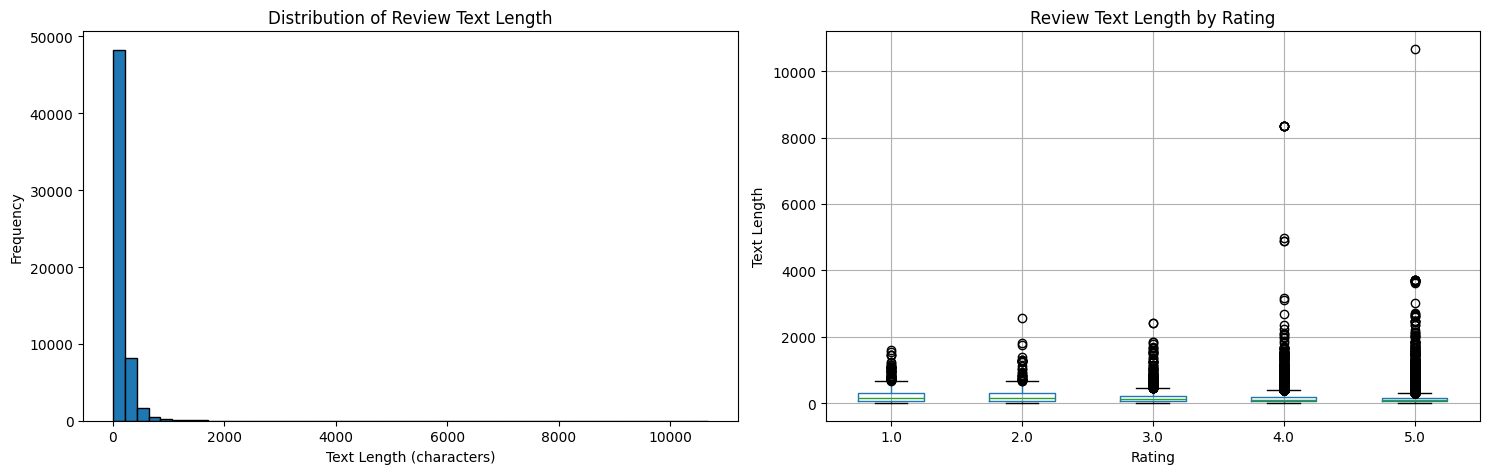


Number of unique products: 125

Top 10 products by number of reviews:
product_name
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                       10962
AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                                    7754
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary                                3519
Echo (White),,,\r\nEcho (White),,,                                                                            3307
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,     3176
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                                       2961
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                       2814
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                        2

) missing from font(s) DejaVu Sans.q69zr0000gn/T/ipykernel_97414/2468423450.py:181: UserWarning: Glyph 13 (
  plt.tight_layout()
/var/folders/fk/mzrzbss139x_9sm1q3wq69zr0000gn/T/ipykernel_97414/2468423450.py:181: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
) missing from font(s) DejaVu Sans.k/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


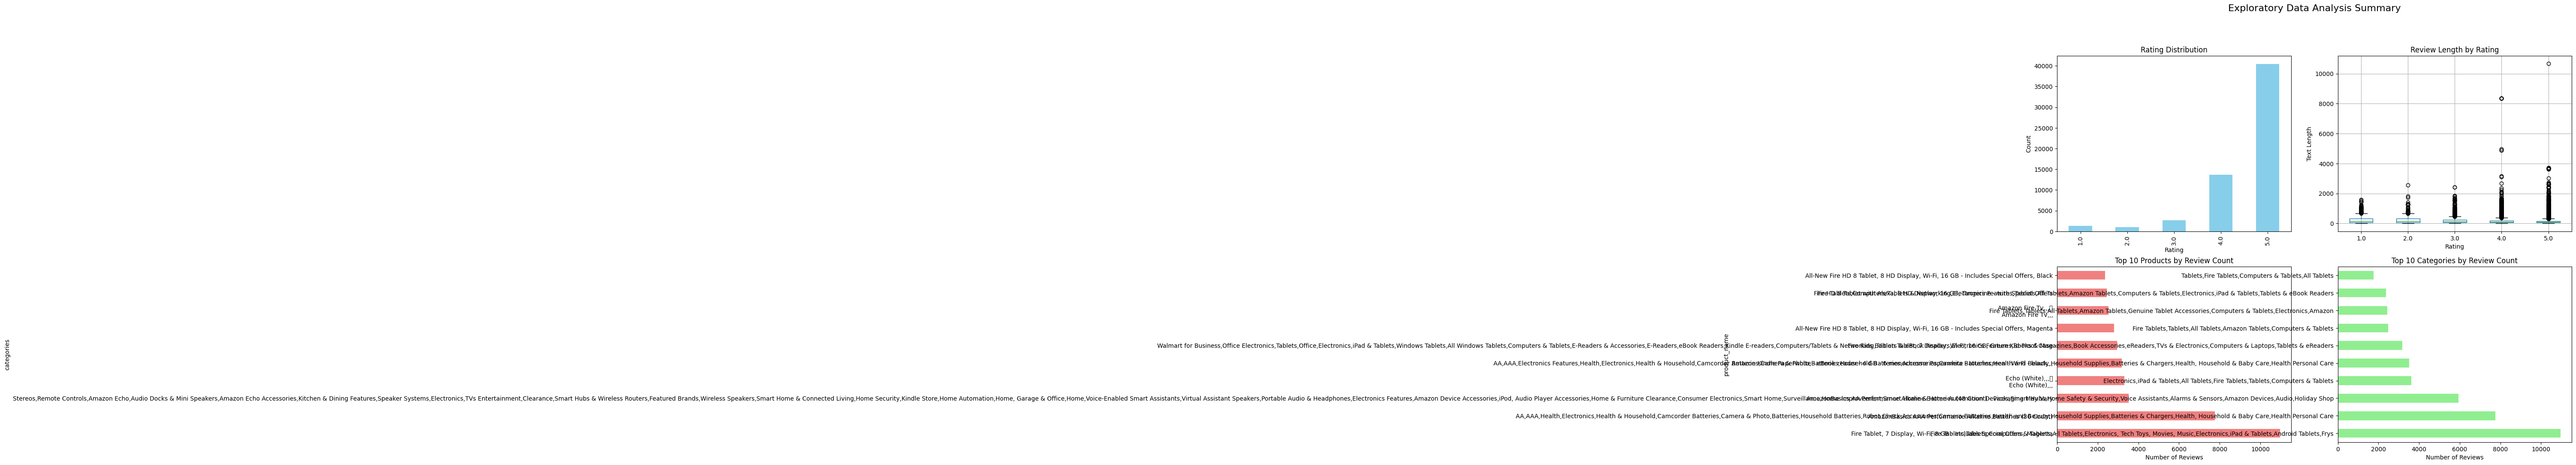

In [4]:
# ==========================================
# 1. BASIC DATASET INFORMATION
# ==========================================

# Shape and basic info
print("Dataset shape:", final_df.shape)
print("\n" + "="*50)
final_df.info()

# First few rows
print("\n" + "="*50)
print(final_df.head(10))

# Statistical summary
print("\n" + "="*50)
final_df.describe()

# ==========================================
# 2. MISSING VALUES ANALYSIS
# ==========================================

# Count and percentage of missing values
print("\n" + "="*50)
print("Missing values:")
missing = pd.DataFrame({
    'column': final_df.columns,
    'missing_count': final_df.isnull().sum(),
    'missing_percentage': (final_df.isnull().sum() / len(final_df) * 100).round(2)
})
print(missing[missing['missing_count'] > 0])

# ==========================================
# 3. RATING DISTRIBUTION (CLASS IMBALANCE)
# ==========================================

# Value counts for ratings
print("\n" + "="*50)
print("Rating distribution:")
print(final_df['review_rating'].value_counts().sort_index())
print("\nRating percentages:")
print(final_df['review_rating'].value_counts(normalize=True).sort_index() * 100)

# Visualize rating distribution
plt.figure(figsize=(10, 6))
final_df['review_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ==========================================
# 4. TEXT LENGTH ANALYSIS
# ==========================================

# Review text length statistics
final_df['review_text_length'] = final_df['review_text'].astype(str).str.len()
final_df['review_title_length'] = final_df['review_title'].astype(str).str.len()

print("\n" + "="*50)
print("Review text length statistics:")
print(final_df['review_text_length'].describe())

# Distribution by rating
print("\n" + "="*50)
print("Average text length by rating:")
print(final_df.groupby('review_rating')['review_text_length'].mean().sort_index())

# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(final_df['review_text_length'], bins=50, edgecolor='black')
axes[0].set_title('Distribution of Review Text Length')
axes[0].set_xlabel('Text Length (characters)')
axes[0].set_ylabel('Frequency')

final_df.boxplot(column='review_text_length', by='review_rating', ax=axes[1])
axes[1].set_title('Review Text Length by Rating')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Text Length')
plt.suptitle('')
plt.tight_layout()
plt.show()

# ==========================================
# 5. PRODUCT ANALYSIS
# ==========================================

# Number of unique products
print("\n" + "="*50)
print(f"Number of unique products: {final_df['product_name'].nunique()}")

# Top products by review count
print("\nTop 10 products by number of reviews:")
print(final_df['product_name'].value_counts().head(10))

# Average rating by product (top products)
print("\nAverage rating for top 10 reviewed products:")
top_products = final_df['product_name'].value_counts().head(10).index
print(final_df[final_df['product_name'].isin(top_products)].groupby('product_name')['review_rating'].mean().sort_values(ascending=False))

# ==========================================
# 6. CATEGORY ANALYSIS
# ==========================================

# Number of unique categories
print("\n" + "="*50)
print(f"Number of unique categories: {final_df['categories'].nunique()}")

# Top categories
print("\nTop 10 categories by review count:")
print(final_df['categories'].value_counts().head(10))

# Average rating by category (top categories)
print("\nAverage rating for top 10 categories:")
top_categories = final_df['categories'].value_counts().head(10).index
print(final_df[final_df['categories'].isin(top_categories)].groupby('categories')['review_rating'].mean().sort_values(ascending=False))

# ==========================================
# 7. DUPLICATE ANALYSIS
# ==========================================

print("\n" + "="*50)
print(f"Number of duplicate rows: {final_df.duplicated().sum()}")
print(f"Number of duplicate review texts: {final_df['review_text'].duplicated().sum()}")

# ==========================================
# 8. SAMPLE REVIEWS BY RATING
# ==========================================

print("\n" + "="*50)
print("Sample reviews for each rating:\n")
for rating in sorted(final_df['review_rating'].unique()):
    print(f"\n--- Rating {rating} ---")
    sample = final_df[final_df['review_rating'] == rating].sample(min(2, len(final_df[final_df['review_rating'] == rating])))
    for idx, row in sample.iterrows():
        print(f"Title: {row['review_title']}")
        print(f"Text: {row['review_text'][:200]}...")
        print()

# ==========================================
# 9. CORRELATION ANALYSIS
# ==========================================

# Correlation between text length and rating
print("\n" + "="*50)
print("Correlation between text length and rating:")
print(f"{final_df[['review_rating', 'review_text_length']].corr().iloc[0, 1]:.3f}")

# ==========================================
# 10. SUMMARY VISUALIZATION
# ==========================================

# Create a comprehensive summary plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Rating distribution
final_df['review_rating'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')

# Text length by rating
final_df.boxplot(column='review_text_length', by='review_rating', ax=axes[0, 1])
axes[0, 1].set_title('Review Length by Rating')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Text Length')

# Top 10 products
final_df['product_name'].value_counts().head(10).plot(kind='barh', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Top 10 Products by Review Count')
axes[1, 0].set_xlabel('Number of Reviews')

# Top 10 categories
final_df['categories'].value_counts().head(10).plot(kind='barh', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Top 10 Categories by Review Count')
axes[1, 1].set_xlabel('Number of Reviews')

plt.suptitle('Exploratory Data Analysis Summary', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()